# Time Series Predictions

We're going to try to predict the daily time series. We are going to use CNN models.

# CNN Model

A one-dimensional CNN is a CNN model that has a convolutional hidden layer that operates over a 1D sequence. This is followed by perhaps a second convolutional layer in some cases, such as very long input sequences, and then a pooling layer whose job it is to distill the output of the convolutional layer to the most salient elements.

The convolutional and pooling layers are followed by a dense fully connected layer that interprets the features extracted by the convolutional part of the model. A flatten layer is used between the convolutional layers and the dense layer to reduce the feature maps to a single one-dimensional vector.

We can define a 1D CNN Model for univariate time series forecasting as follows.





### Let's import the libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


from keras.models import Sequential
from keras.layers import Dense,RepeatVector
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D



from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import os
print(os.listdir("../input"))


Using TensorFlow backend.


['shops.csv', 'item_categories.csv', 'sales_train.csv', 'items.csv', 'sample_submission.csv', 'test.csv']


In [2]:
data=pd.read_csv('../input/sales_train.csv')


In [ ]:
data.info()

As we can see, the date is object and we have to convert date column to datetime. So we are going to use to_datetime function for the convert.

In [9]:
data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [10]:
data['date'] = pd.to_datetime(data['date'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              datetime64[ns]
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB


We are going to convert hourly data to daily data

In [12]:
data.set_index(['date'],inplace=True)
data = data['item_cnt_day'].resample('D').sum()
df=pd.DataFrame(data)

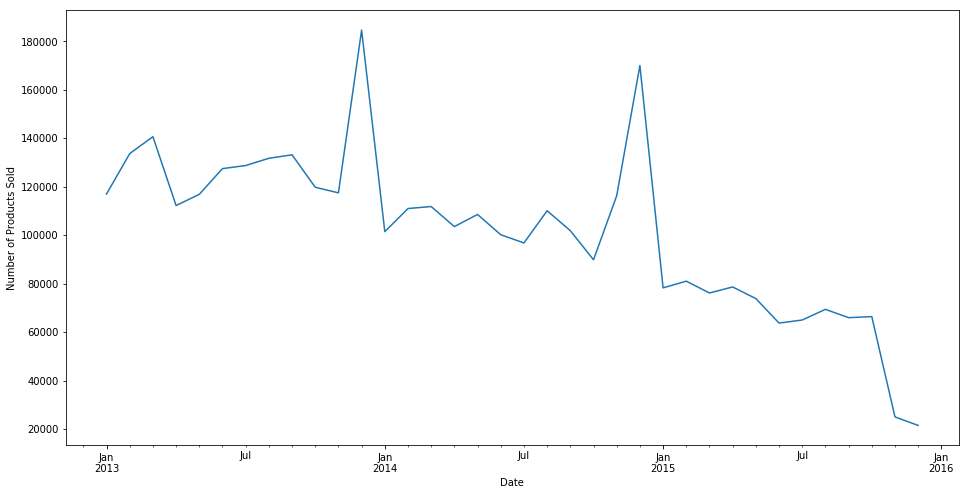

In [13]:
plt.figure(figsize=(16,8))
df['item_cnt_day'].plot()
plt.xlabel('Date')
plt.ylabel('Number of Products Sold')
plt.show()

In [15]:
df_1=df.values
df_1=df_1.astype('float32')

scaler = MinMaxScaler(feature_range=(-1,1))
ts = scaler.fit_transform(df_1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2013-01-31 to 2015-12-31
Freq: M
Data columns (total 1 columns):
item_cnt_day    36 non-null float64
dtypes: float64(1)
memory usage: 576.0 bytes


In [19]:
timestep = 30

X= []
Y=[]

raw_data=ts

for i in range(len(raw_data)- (timestep)):
    X.append(raw_data[i:i+timestep])
    Y.append(raw_data[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 850
Xtrain = X[:k,:,:]  
Ytrain = Y[:k]    

In [21]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(3, 1)))
model.add(Conv1D(filters=16, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=8, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(Xtrain, Ytrain, epochs=1000, verbose=0)

ValueError: Negative dimension size caused by subtracting 2 from 1 for 'conv1d_6/convolution/Conv2D' (op: 'Conv2D') with input shapes: [?,1,1,16], [1,2,16,8].

In [ ]:
Xtest = X[k:,:,:]  
Ytest= Y[k:]  

In [ ]:
preds = model.predict(Xtest)
preds = scaler.inverse_transform(preds)


Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 
Ytest = scaler.inverse_transform(Ytest)


Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 
Ytrain = scaler.inverse_transform(Ytrain)

mean_squared_error(Ytest,preds)

In [ ]:
from matplotlib import pyplot
pyplot.figure(figsize=(20,10))
pyplot.plot(Ytest)
pyplot.plot(preds, 'r')
pyplot.show()

### Thank you 

